In [1]:
import numpy as np
import random
import scipy.stats as sps
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.8)

In [2]:
# зафиксируем сид для воспроизводимости генерации
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Проверка гипотез

В данной задаче вам предлагается изучить основы работы с критериями при проверке различных гипотез.

## Построение критерия

Будем рассматривать выборку из нормального распределения $\mathcal{N}(\theta, 1)$. Необходимо провести проверку гипотезы равенства параметра распределения нулю с двусторонней альтернативой $\mathsf{H}_0\colon \theta = 0$ vs. $\mathsf{H}_1\colon \theta \neq 0$.

Как строить критерии в общем случае вы узнаете позже. А для начала попробуем построить критерий "из здравого смысла". На предыдущих лекциях вы учились строить доверительные интервалы для выборочного среднего, которое является асимптотически нормально оценкой матожидания случайной величины.

В случае нормального распределения и известной $\sigma = 1$ на лекции получали ТДИ с уровнем доверия $\alpha_{int}$: $$\left(\overline{X} - \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}, \overline{X} + \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}\right)$$

Здесь использован тот факт, что среднее $n$ случайных величин, полученных из $\mathcal{N}(\theta, 1)$, имеет нормальное распределение $\mathcal{N}(\theta, \frac{1}{n})$.

Зная этот факт, мы можем попробовать использовать следующий критерий для проверки гипотезы $\mathsf{H}_0\colon \theta = 0$ vs. $\mathsf{H}_1\colon \theta \neq 0$:
$$S=\left\{ 0 \notin \left(\overline{X} - \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}, \overline{X} + \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}\right)\right\}$$

Таким образом, при получении выборки $X$ проверка $\mathsf{H}_0$ выглядит следующим образом:

$$X \in S  \Leftrightarrow	\text{доверительный интервал НЕ покрывает 0} \Leftrightarrow \mathsf{H}_0 \text{ отвергается}$$
$$X \notin S  \Leftrightarrow	\text{доверительный интервал покрывает 0} \Leftrightarrow \mathsf{H}_0 \text{ НЕ отвергается}$$

Однако, для корректного использования данного критерия необходимо верно подобрать значение $\alpha_{int}$.

**Вопрос**: Какую величину мы ограничиваем при построении критерия? Какое $\alpha_{int}$ нам нужно взять, чтобы проверить гипотезу на уровне значимости $\alpha=0.05$?

*Подсказка*: $\alpha_{int}$ определяет вероятность лежать в доверительном интервале

**Ответ**: ограничиваем ошибку 1 рода, 0.95

## Ошибки при проверке гипотез

Рассмотрим следующую выборку из нормального распределения $\mathcal{N}(0, 1)$. Проверьте, выполняется ли для нее придуманный нами критерий.

In [3]:
sample = [-0.82899501, -0.56018104,  0.74729361,  0.61037027, -0.02090159,
          0.11732738,  1.2776649 , -0.59157139,  0.54709738, -0.20219265,
          -0.2176812 ,  1.09877685,  0.82541635,  0.81350964,  1.30547881,
          0.02100384,  0.68195297, -0.31026676,  0.32416635, -0.13014305,
          0.09699596,  0.59515703, -0.81822068,  2.09238728, -1.00601738,
          -1.21418861,  1.15811087,  0.79166269,  0.62411982,  0.62834551]

In [7]:
n = 30
alpha = 0.05
z = sps.norm.ppf(1 - alpha/2)

# посчитайте оценки параметров по имеющейся выборке
theta_hat = np.mean(sample)
sigma_hat = np.std(sample)

# постройте доверительный интервал и выведите его
theta_hat - z * sigma_hat / np.sqrt(n), theta_hat + z * sigma_hat / np.sqrt(n)

0.28188260499999995


(0.008416605863894033, 0.5553486041361059)

Отвергается ли гипотеза $\mathsf{H}_0$ для данной выборки?

**Ответ**: отвергается

Почему это произошло и как называется такая ошибка?

**Ответ**: ошибка 1 рода, потому что есть такая вероятность, что мы отвергнем верную гипотезу, и мы туда попали (5%)

Теперь рассмотрим выборку, сгенерированную из нормального распределения $\mathcal{N}(0.5, 1)$. Так как $\theta \neq 0$ наш критерий не должен выполняться. Проверьте, дейстивительно ли это так.

In [8]:
sample = [ 0.12452627,  0.95075805,  0.77166076, -1.45365582, -0.49410224,
          1.66660296, -0.93194618, -0.42985368,  0.27260541,  1.46066343,
          -1.31198164,  0.20520295,  3.19213611,  0.55957285,  0.50613194,
          0.05689217, -0.8558408 ,  0.12584525,  0.73918692, -0.05739113,
          0.76803961,  0.32823556,  0.05156772, -0.0566054 ,  0.60217298,
          2.21606323, -1.02851902, -0.56797192, -0.64263642,  0.95315636]

In [10]:
n = 30

# посчитайте оценки параметров по имеющейся выборке
theta_hat = np.mean(sample)
sigma_hat = np.std(sample)

# постройте доверительный интервал и выведите его
theta_hat - z * sigma_hat / np.sqrt(n), theta_hat + z * sigma_hat / np.sqrt(n)

(-0.10302365708950356, 0.6177247424228368)

Отвергается ли гипотеза $\mathsf{H}_0$ для данной выборки?

**Ответ**: не отвергается

Почему так произошло и как называетcя такая ошибка?


**Ответ**: ошибка 2 рода, мы хотели бы отвергнуть (потому что $\theta = 0.5$), но не отвергли. недостаточно мощный критерий.

## Мощность критерия

Теперь попробуем аналитически вывести мощность получившегося критерия. Для этого вспомним, что мощность является вероятностью выполнения критерия (т.е. $X \in S$) в случае заведомой верности альтернативной гипотезы $\mathsf{H}_1\colon \theta \neq 0$.

Для выборки из нормального распределения $\mathcal{N}(\theta, 1)$ посчитаем вероятность того, что $0$ не попадает в доверительный интервал $\left(\overline{X} - \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}, \overline{X} + \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}\right)$.

$$P\left( 0 \notin \left(\overline{X} - \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}, \overline{X} + \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}\right)\right) = P\left( \overline{X} \notin \left(- \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}, \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}\right)\right) = 1 - P\left( \overline{X} \in \left(- \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}, \frac{z_{\frac{1+\alpha_{int}}{2}}}{\sqrt{n}}\right)\right)$$

Как уже упоминалось в задании выше, $\overline{X}$ имеет распределение $\mathcal{N}(\theta, \frac{1}{n})$. Зная этот факт, мы можем посчитать вероятность попасть в данный интервал с помощью функции распределения $F$ нормального распределения $\mathcal{N}(\theta, \frac{1}{n})$. Введем также следующие обозначения: $\alpha = 1-\alpha_{int}$, $c=\frac{z_{1-\frac{\alpha}{2}}}{\sqrt{n}}$.

$$P\left( \overline{X} \leq - c\right) = F(-c)$$
$$P\left( \overline{X} \leq c\right) = F(c)$$
$$P\left( \overline{X} \in \left(- c, c\right)\right) = F(c)-F(-c)$$

И, следовательно, мощность нашего критерия принимает следующий вид: $$\beta = 1 - F(с) +F(-с)$$

где $F$ - функция распределения $\overline{X}$.

Постройте график полученной мощности критерия для $\theta \in [-1, 1]$ при условии, что мы работаем с выборками из 30 элементов и уровнем значимости $0.05$.

In [11]:
# Функция для вычисления мощности построенного критерия
def get_power(theta, n, c):
    """
    param theta: значение параметра
    param n: количество элементов выборки
    param с: критическое значение

    return beta - мощность критерия
    """
    c = np.abs(c)

    # Для подсчета значений функции распределения из beta вам понадобятся функции cdf и sf для распределений из scipy.stats
    # ! Не забывайте, что параметр scale нормального распределения sps.norm принимает корень из дисперсии !
    beta = 1- sps.norm(theta, 1/np.sqrt(n)).cdf(c)+sps.norm(theta,1/np.sqrt(n)).cdf(-c)

    return beta

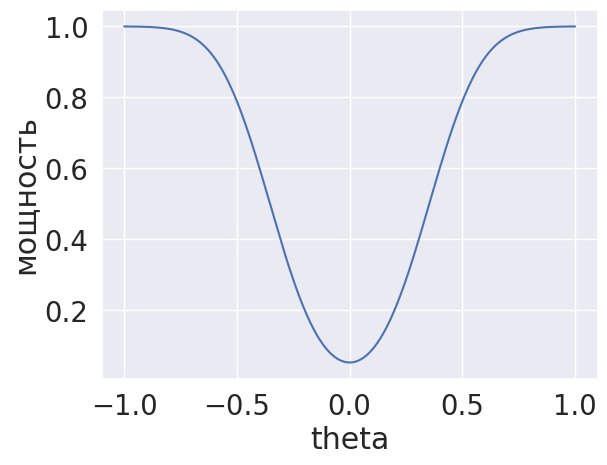

In [16]:
n = 30
alpha = 0.05

# Зададим сетку параметров theta
grid = np.linspace(-1, 1, 200)

c = (z - alpha/2)/np.sqrt(n)
plt.xlabel('theta')
plt.ylabel('мощность')
powers = get_power(grid, n, c)
plt.plot(grid, powers)

Какой вывод можно сделать из графика? Как изменяется значение мощности при удалении от точки $\theta = 0$?

**Ответ**: при удалении от нуля значение мощности растет и стремится к единице, то есть мощность растет, то есть растет вероятность, что выполняется критерий, а значит повышается вероятность отвергнуть $H_0$